# Import Modules

In [1]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf
from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')

#warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
## Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 3
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 2
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   5


Please enter a valid input


C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   1
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  4
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 5


Please enter a valid input


E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 4


Your risk factor is 0.7


In [3]:
# print(client_risk)

In [4]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 5


# Data Input for Universe (Multiple Asset Classes)

In [5]:
# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2018-05-11'

'2023-05-10'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0.004362,-0.001886,0.008820,-0.002277,0.000183,-0.004465,-0.001637,0.001524,0.006898,-0.009009,...,0.004415,-0.002559,0.000682,0.002100,0.000979,0.010794,0.000797,0.002121,0.004742,-0.003098
2018-06-21,-0.005576,0.000283,-0.011348,0.000507,0.000365,-0.003377,0.000041,-0.010412,-0.009168,-0.001414,...,-0.018516,-0.002933,-0.012554,-0.007684,0.001956,0.005967,0.003384,-0.005762,-0.007123,-0.009447
2018-06-22,-0.002912,0.000945,-0.008409,0.000634,0.000183,0.000265,0.001188,-0.001883,-0.008748,-0.003035,...,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006944,0.004494,-0.001704,0.021207
2018-06-25,-0.014871,-0.000566,-0.030612,-0.000127,-0.001644,-0.011540,0.000921,-0.026543,-0.014783,0.000000,...,-0.020093,-0.010713,-0.012671,-0.020762,0.005036,-0.002476,0.016552,-0.009184,-0.021739,-0.020153
2018-06-26,0.012406,0.001605,0.016799,0.001647,0.000000,-0.001553,0.000306,-0.005645,0.001395,0.005479,...,0.012629,-0.003361,0.003766,0.004039,-0.004240,0.005275,0.001163,-0.003090,0.007163,0.011287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,-0.006467,0.004415,0.000193,0.004197,-0.000815,-0.008102,0.003038,0.001321,-0.000565,-0.001233,...,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915,-0.019709
2023-05-04,-0.009913,-0.001199,0.003377,-0.001348,0.000204,-0.009962,-0.000649,-0.008575,-0.001273,-0.005599,...,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703,-0.017511
2023-05-05,0.046927,-0.003201,0.015962,-0.003645,-0.003874,0.012125,-0.003247,0.009552,0.010905,-0.002298,...,0.027141,0.024723,0.015097,0.025078,0.009285,0.015460,0.006415,0.008988,0.020240,0.024896


In [6]:
display(og_data)

Adj Close                                                \
                  AAPL         AGG        AMZN        BND       BNDX   
Date                                                                   
2018-05-11   45.120022   93.888748   80.145500  69.423019  48.001514   
2018-05-14   45.014755   93.800026   80.077003  69.334999  47.931129   
2018-05-15   44.605640   93.383186   78.806000  69.009605  47.834332   
2018-05-16   45.021935   93.276764   79.363998  68.956848  47.834332   
2018-05-17   44.737221   93.152611   79.087997  68.895264  47.790340   
...                ...         ...         ...        ...        ...   
2023-05-03  167.449997  100.089996  103.650002  74.169998  49.029999   
2023-05-04  165.789993   99.970001  104.000000  74.070000  49.040001   
2023-05-05  173.570007   99.650002  105.660004  73.800003  48.849998   
2023-05-08  173.500000   99.099998  105.830002  73.449997  48.740002   
2023-05-09  171.770004   99.010002  106.620003  73.370003  48.709999   

                                                                     ...  \
                 BRK-B       FBND        GOOG       ICVT       LKOR  ...   
Date                                                                 ...   
2018-05-11  199.300003  41.902027   54.912998  47.299870  40.864697  ...   
2018-05-14  199.179993  41.936409   55.009998  47.381836  40.740238  ...   
2018-05-15  197.360001  41.738682   53.961498  47.349056  40.323174  ...   
2018-05-16  197.830002  41.781677   54.088501  47.603142  40.177685  ...   
2018-05-17  197.490005  41.730099   53.929501  47.496597  40.080708  ...   
...                ...        ...         ...        ...        ...  ...   
2023-05-03  323.220001  46.230000  106.120003  70.699997  43.759998  ...   
2023-05-04  320.000000  46.200001  105.209999  70.610001  43.514999  ...   
2023-05-05  323.880005  46.049999  106.214996  71.379997  43.415001  ...   
2023-05-08  326.140015  45.820000  108.239998  71.709999  42.919998  ...   
2023-05-09  324.869995  45.779999  107.940002  71.639999  42.909000  ...   

              Volume                                                   \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2018-05-11  12010700  25894000   8060000   8760600  10065200  1206700   
2018-05-14  10226300  31292900   5856600  10130900   6708100  1882900   
2018-05-15  10482700  54655800  10180500  14262600  22686900  2371100   
2018-05-16  11997200  31984900   6281300   6680500  12151300  1562100   
2018-05-17  16271300  45070400   7519500  10800100  19572900  1758200   
...              ...       ...       ...       ...       ...      ...   
2023-05-03  29683800  65642400  13371600   5815100  11656600  6140700   
2023-05-04  26430500  76076600  15150000   5430500  11682600  4887800   
2023-05-05  19533600  54989500   9231300   6114200  10479100  3265100   
2023-05-08  16355900  34323600   7610200   3397800   8069200  3358700   
2023-05-09  20706300  29729400   8068100   6236600   6939500  2995000   

                                                   
                 XLU       XLV      XLY       XOM  
Date                                               
2018-05-11   6478900  10434000  4424100  14751000  
2018-05-14   8512800  11837600  3324900  11852100  
2018-05-15  11070700   8806800  4558000  12595700  
2018-05-16  13541300   7013600  3239200   9570000  
2018-05-17  11276000   6610400  6364500  11224100  
...              ...       ...      ...       ...  
2023-05-03  11857200   8961500  4256000  16212300  
2023-05-04  14631100   9625300  5331500  17177200  
2023-05-05  11416600   7650300  3685900  14964700  
2023-05-08   8286700   5305700  3425000  11187800  
2023-05-09  10281100   6452700  4232500  11369900  

[1257 rows x 180 columns]

# Client Scaling Factor

This code was added to ensure that the calculation from the client had a risk aversion factor between 0 and 1, where 0 is highly risk adverse & 1 is low risk aversion. 

In [7]:
# Client fear factor scaling. necessary as porfolio optimization solution uses an logarithmic estimation
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(f'Client risk aversion is: {fear_factor}')

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(f'Client risk aversion is: {fear_factor}')
elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(f'Client risk aversion is: {fear_factor}')
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(f'Client risk aversion is: {fear_factor}')
    else:
        print(f"Number isn't between 0 and 1")
       

Client risk aversion is: 2.5


# Portfolio Optimization using Risk Parity Model

In [8]:
import riskfolio as rp
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,0.341968,5.429845e-07,4.004173e-08,4.835444e-07,4.075080e-07,2.207379e-07,4.371921e-07,7.652779e-08,9.923868e-08,1.363884e-07,...,9.196745e-08,6.295074e-08,8.226613e-08,7.717136e-08,0.051285,8.176754e-08,5.421331e-07,2.082213e-07,5.018625e-08,0.089636


# Optimal Portfolio

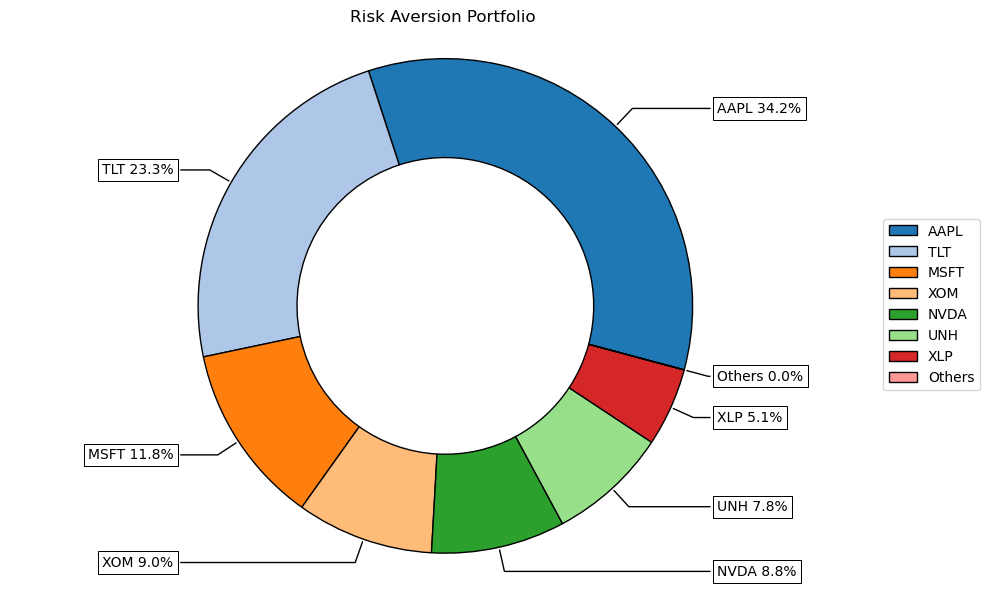

In [9]:
ax = rp.plot_pie(w=w, title='Risk Aversion Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

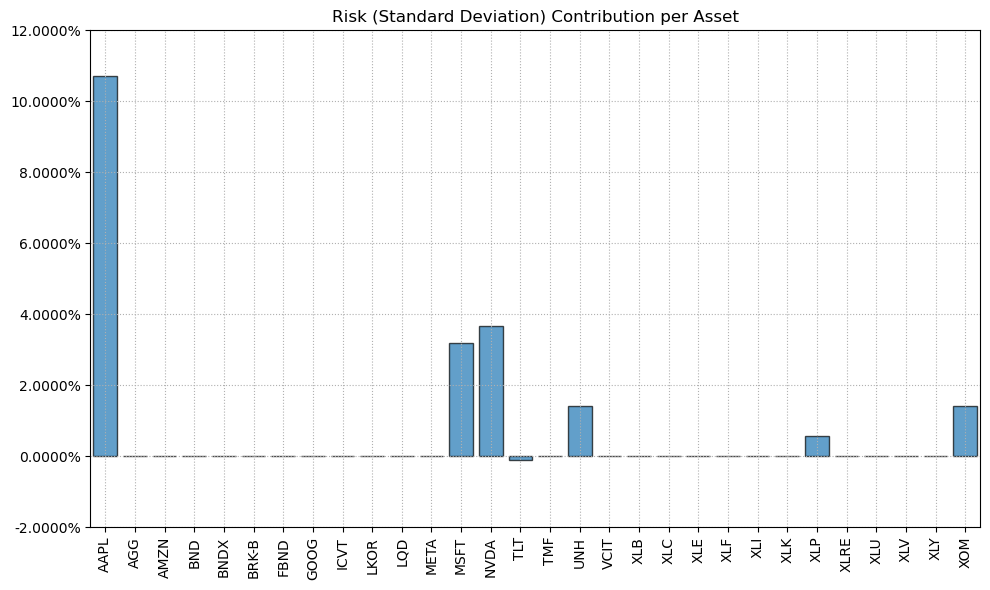

In [10]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [11]:
# used to save weights to a csv file
#w.to_csv(Path("w.csv"))

# Portfolio Optimization (Assuming uniformly distributed risk across all assets)

Special case of risk parity (vanilla risk parity where risk is equally weighted across all assets) 

In [12]:
# Risk parity porfolio assuming that risk is eqaully distributed, where 'b' which is a constraint variable is set to none
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,0.341968,5.429845e-07,4.004173e-08,4.835444e-07,4.075080e-07,2.207379e-07,4.371921e-07,7.652779e-08,9.923868e-08,1.363884e-07,...,9.196745e-08,6.295074e-08,8.226613e-08,7.717136e-08,0.051285,8.176754e-08,5.421331e-07,2.082213e-07,5.018625e-08,0.089636


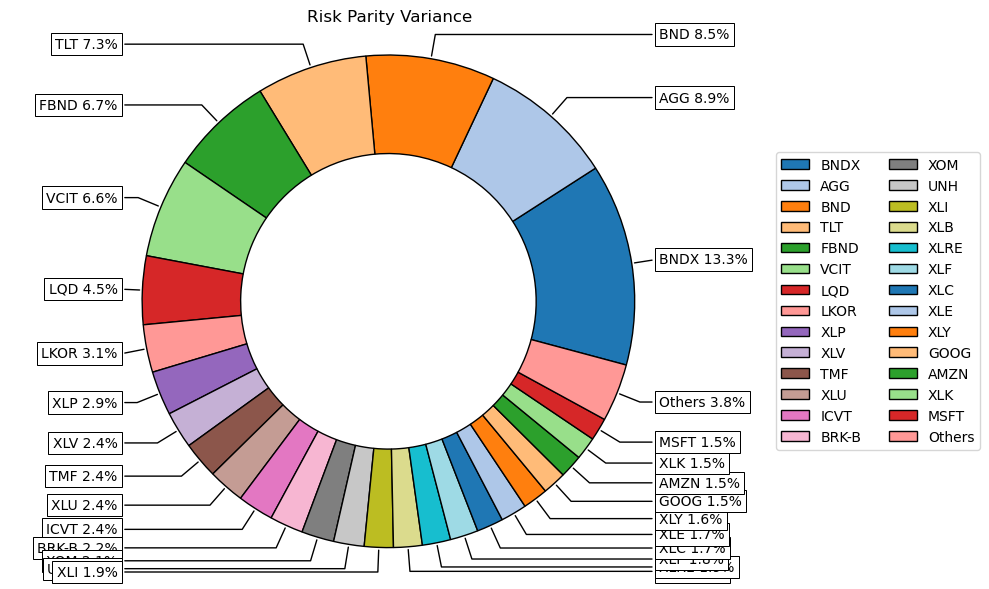

In [13]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

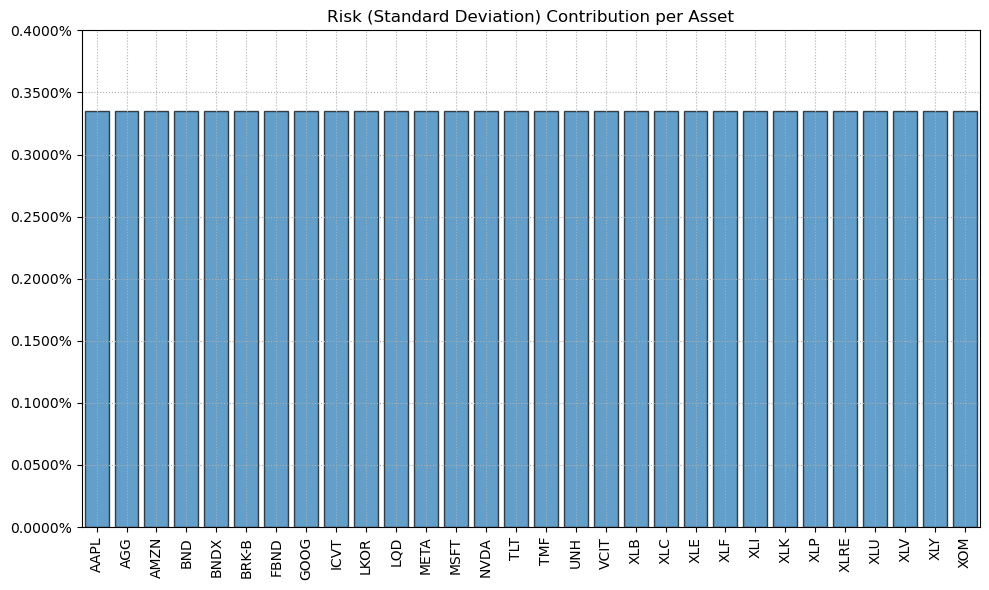

In [14]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# Monte Carlo Simulation

In [23]:
#using the weight 'w' from the optimal portfolio as the weights to simulate the projected returns from the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)

# Monte Carlo simulation is on the optimal portfolio
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,3.419676e-01
1,AGG,5.430000e-07
2,AMZN,4.000000e-08
3,BND,4.835000e-07
4,BNDX,4.075000e-07


In [24]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

# test to ensure weights are float
#for i in weights_list:
   # print(type(i))
    

[0.3419675523,
 5.43e-07,
 4e-08,
 4.835e-07,
 4.075e-07,
 2.207e-07,
 4.372e-07,
 7.65e-08,
 9.92e-08,
 1.364e-07,
 2.292e-07,
 4.12e-08,
 0.1183498899,
 0.0875227418,
 0.2327781877,
 2.161e-07,
 0.0784557999,
 5.346e-07,
 8.51e-08,
 4.38e-08,
 9.2e-08,
 6.3e-08,
 8.23e-08,
 7.72e-08,
 0.0512854124,
 8.18e-08,
 5.421e-07,
 2.082e-07,
 5.02e-08,
 0.0896356253]

In [25]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1).dropna()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG              \
                  open       close daily_return        open       close   
Date                                                                      
2018-06-20   46.587502   44.619995     0.004362  106.059998   94.064384   
2018-06-21   46.812500   44.371178    -0.005576  105.879997   94.091080   
2018-06-22   46.529999   44.241974    -0.002912  105.820000   94.179955   
2018-06-25   45.849998   43.584042    -0.014871  105.949997   94.126602   
2018-06-26   45.747501   44.124744     0.012406  105.989998   94.277771   
...                ...         ...          ...         ...         ...   
2023-05-03  169.500000  167.449997    -0.006467   99.889999  100.089996   
2023-05-04  164.889999  165.789993    -0.009913   99.769997   99.970001   
2023-05-05  170.979996  173.570007     0.046927   99.639999   99.650002   
2023-05-08  172.479996  173.500000    -0.000403   99.209999   99.099998   
2023-05-09  173.050003  171.770004    -0.009971   99.110001   99.010002   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2018-06-20    -0.001887   87.125000   87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284   88.000000   86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945   87.130997   85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566   85.125504   83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606   83.618500   84.554497     0.016799  79.000000  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-03     0.004415  103.739998  103.650002     0.000193  74.019997  ...   
2023-05-04    -0.001199  104.040001  104.000000     0.003377  73.919998  ...   
2023-05-05    -0.003201  104.269997  105.660004     0.015962  73.809998  ...   
2023-05-08    -0.005519  105.040001  105.830002     0.001609  73.500000  ...   
2023-05-09    -0.000908  105.480003  106.620003     0.007465  73.430000  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2018-06-20     0.000797   84.970001   78.318893     0.002121  112.360001   
2018-06-21     0.003385   84.959999   77.867622    -0.005762  112.470001   
2018-06-22     0.006944   84.860001   78.217583     0.004494  112.000000   
2018-06-25     0.016552   84.610001   77.499252    -0.009184  110.860001   
2018-06-26     0.001163   84.220001   77.259773    -0.003090  109.309998   
...                 ...         ...         ...          ...         ...   
2023-05-03    -0.002784  134.259995  133.460007    -0.001347  145.940002   
2023-05-04     0.007639  132.899994  132.399994    -0.007943  145.410004   
2023-05-05     0.006415  133.270004  133.589996     0.008988  145.630005   
2023-05-08    -0.003042  133.389999  133.300003    -0.002171  147.639999   
2023-05-09    -0.001308  132.789993  132.410004    -0.006677  146.880005   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2018-06-20  106.909920     0.004741   80.849998   62.641472    -0.003098  
2018-06-21  106.148376    -0.007123   80.019997   62.049717    -0.009447  
2018-06-22  105.967522    -0.001704   81.160004   63.365601     0.021207  
2018-06-25  103.663864    -0.021739   80.779999   62.088619    -0.020153  
2018-06-26  104.406372     0.007163   80.150002   62.789398     0.011287  
...                ...          ...         ...         ...          ...  
2023-05-03  145.389999    -0.007915  109.080002  107.930000    -0.019709  
2023-05-04  144.270004    -0.00

In [26]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=40,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG             \
                 open      close daily_return        open      close   
Date                                                                   
2018-06-20  46.587502  44.619995     0.004362  106.059998  94.064384   
2018-06-21  46.812500  44.371178    -0.005576  105.879997  94.091080   
2018-06-22  46.529999  44.241974    -0.002912  105.820000  94.179955   
2018-06-25  45.849998  43.584042    -0.014871  105.949997  94.126602   
2018-06-26  45.747501  44.124744     0.012406  105.989998  94.277771   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2018-06-20    -0.001887  87.125000  87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284  88.000000  86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945  87.130997  85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566  85.125504  83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606  83.618500  84.554497     0.016799  79.000000  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2018-06-20     0.000797  84.970001  78.318893     0.002121  112.360001   
2018-06-21     0.003385  84.959999  77.867622    -0.005762  112.470001   
2018-06-22     0.006944  84.860001  78.217583     0.004494  112.000000   
2018-06-25     0.016552  84.610001  77.499252    -0.009184  110.860001   
2018-06-26     0.001163  84.220001  77.259773    -0.003090  109.309998   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2018-06-20  106.909920     0.004741  80.849998  62.641472    -0.003098  
2018-06-21  106.148376    -0.007123  80.019997  62.049717    -0.009447  
2018-06-22  105.967522    -0.001704  81.160004  63.365601     0.021207  
2018-06-25  103.663864    -0.021739  80.779999  62.088619    -0.020153  
2018-06-26  104.406372     0.007163  80.150002  62.789398     0.011287  

[5 rows x 90 columns]

In [27]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992622,1.021077,0.995870,1.009916,1.002834,1.014421,1.007888,0.987995,0.999930,1.006090,...,0.979058,1.023227,1.012101,1.001435,0.998738,1.001804,1.016012,0.997876,0.984852,1.001658
2,0.988851,1.021064,0.989725,1.003510,0.999629,1.025869,1.015589,0.976751,1.000685,1.004739,...,0.981765,1.029430,0.998361,1.010025,0.988681,0.989355,1.022969,1.021168,0.986487,1.001760
3,0.989910,1.004897,1.001867,1.000196,1.000773,1.018705,1.014392,0.981929,1.007349,1.013914,...,0.985504,1.025709,1.002561,1.013449,0.992789,0.978986,1.024550,1.022614,0.999548,0.994187
4,0.995126,1.009595,1.002562,1.002874,1.018616,1.009739,1.009210,0.976507,1.009116,1.017019,...,0.981661,1.044812,1.018126,1.000389,0.979860,0.968939,1.028491,1.017822,1.017070,0.994097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.429839,3.814334,3.561841,3.601346,1.893606,2.345956,2.993121,2.361042,4.141360,3.197714,...,1.467372,3.789483,3.143637,4.633767,2.661514,3.140107,4.189657,3.773913,5.573240,2.317028
1257,5.442399,3.791790,3.583053,3.566460,1.885826,2.340116,2.981597,2.379348,4.076166,3.217616,...,1.473255,3.774439,3.120506,4.664997,2.671195,3.182981,4.218909,3.720691,5.576870,2.317889
1258,5.434044,3.740549,3.593079,3.546381,1.867576,2.337624,3.010726,2.376618,4.075482,3.253844,...,1.487245,3.832748,3.131970,4.677730,2.651438,3.164298,4.185997,3.752612,5.605989,2.332606
1259,5.376810,3.776513,3.608042,3.512809,1.903820,2.354430,3.046326,2.369317,4.038932,3.251440,...,1.481663,3.827186,3.164244,4.642822,2.665834,3.219338,4.185377,3.759829,5.599237,2.329983


<AxesSubplot:title={'center':'40 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

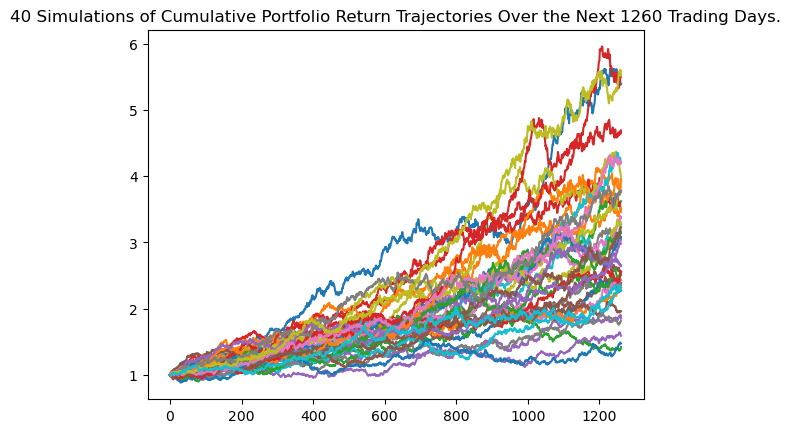

In [28]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 40 Simulations'}, ylabel='Frequency'>

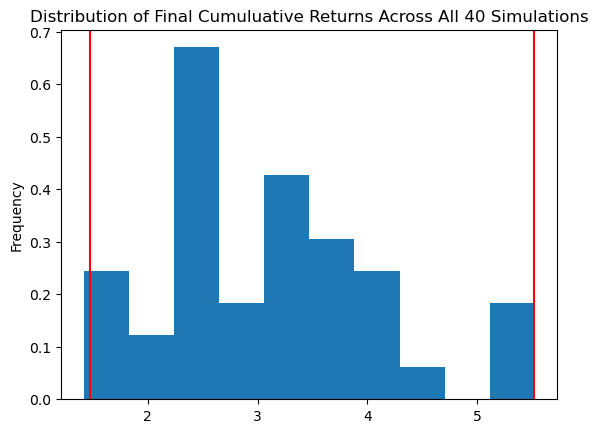

In [29]:
thirty_year_simulation.plot_distribution()

In [30]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count           40.000000
mean             3.114360
std              1.052519
min              1.421107
25%              2.323299
50%              3.055922
75%              3.771751
max              5.522629
95% CI Lower     1.473488
95% CI Upper     5.518101
Name: 1260, dtype: float64

In [ ]:
ci_lower_thirty_cumulative_return = round(thirty_year_simulation_statistics[8],2)
ci_upper_thirty_cumulative_return = round(thirty_year_simulation_statistics[9],2)
print(f"There is a 95% chance that the current that the portfolio Fab Five Roboadvisors recommended for you "
      f"will return between {ci_lower_thirty_cumulative_return}% and {ci_upper_thirty_cumulative_return}% over the next 10 years.")
